# Retrieving Painting Images From WikiArt #

In this notebook we demonstrate how to use our web scraping and image formatting functions to compose a deep learning dataset.

In [12]:
# import utility functions
from utils.image_scrape import *
from utils.image_formatting import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First we download the links to all of the paintings for a given artist with the function `get_image_urls()`. For this example we will download images for Picasso, Monet, and Van Gogh. Specific artists must be specified with the format indicated in `image_scrape.PAINTER_DICT`. Links to painting images are stored at `data/painting_links/<artist>` for each artist. For demonstration purposes we will download only three links each, but in practice we download as many as 1000 for a given artist.

In [2]:
artists = ['pablo-picasso', 'claude-monet', 'vincent-van-gogh']   # define artists

get_image_urls(num_links=3, artists=artists)                      # download links to images

Now we call the function `download_data()` to download the images at the image urls. Downloaded images are stored at `data/images/<artist>`. We use the function `show_image()` to display the downloaded images in the Jupyter notebook.

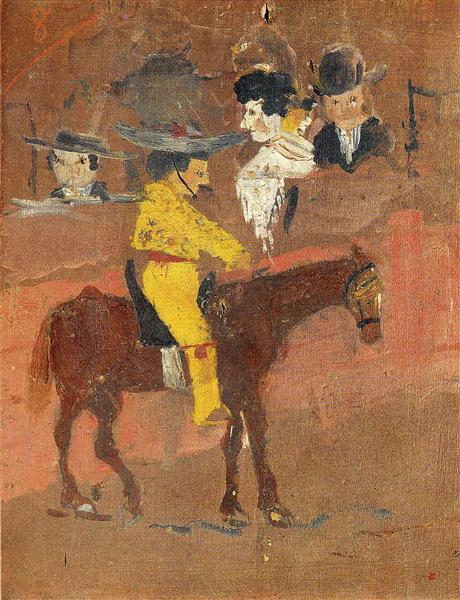

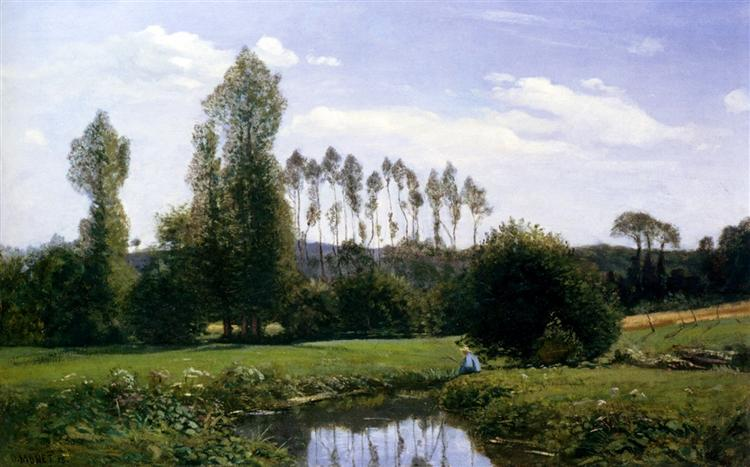

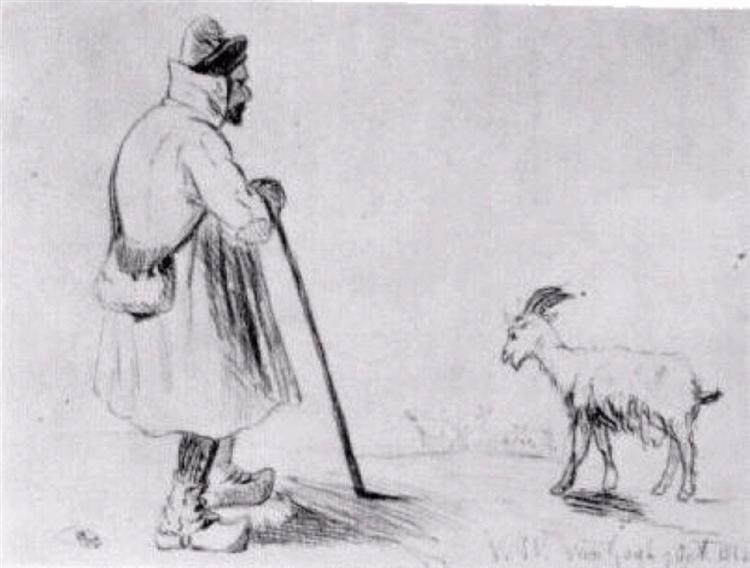

In [6]:
download_data(artists=artists, images_per_artist=3)               # download images at links

show_image('data/images/pablo-picasso/0.jpg')                     # show downloaded images
show_image('data/images/claude-monet/0.jpg')
show_image('data/images/vincent-van-gogh/0.jpg')

Note that the images have various different orientations, sizes, and resolutions. To use these images in a deep learning framework we need to standardize them to a common aspect ratio and pixel resolution. To accomplish this we apply zero padding to images that are not square and downsample the images from their original resolution to 256 x 256 pixels. This is implemented in the `standardize_images()` function. Standardized images are stored at `data/images/<artist>_standardized`. We show an example of an image before and after standardization.

Standardizing pablo-picasso's images
Standardizing claude-monet's images
Standardizing vincent-van-gogh's images


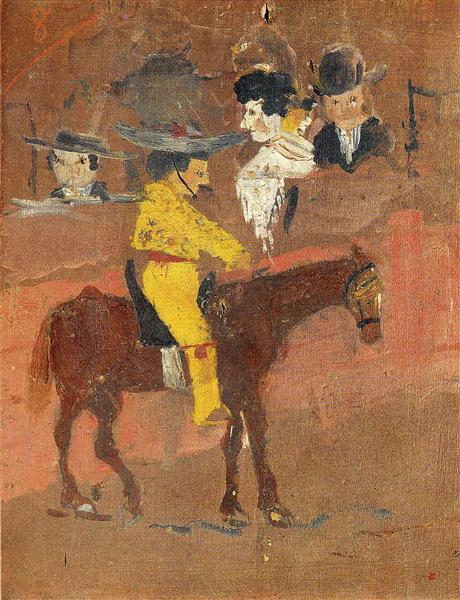

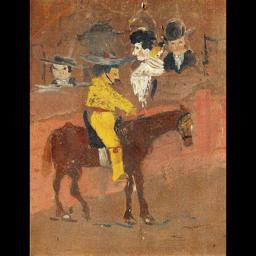

In [7]:
resolution = (256, 256)                                        # specify resolution

standardize_images(artists=artists, resolution=resolution)     # pad and resize images

show_image('data/images/pablo-picasso/0.jpg')
show_image('data/images/pablo-picasso_standardized/0.jpg')

Now that our images all have the same aspect ratio and resolution, we load them into memory to be used to train deep learning networks. The function `preprocess_images()` accumulates images for all the specified artists and returns them as a 4 dimensional array with shape (number of images, image width, image height, RGB channels). It also assigns integer labels to each image, indicating the painter of the image, and returns these labels as a 1 dimensional array.

In [14]:
X, y = preprocess_images2(artists=artists, n_imgs=3)     # get all images + labels and read into memory as arrays

print(X.shape, y.shape)

(9, 256, 256, 3) (9,)
